baserules 108
expanded rules 528


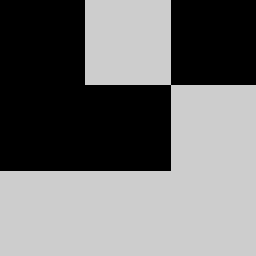

1 4 4


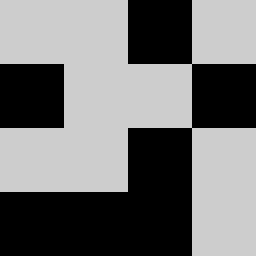

2 6 6


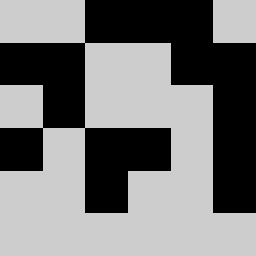

3 9 9


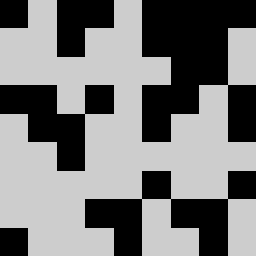

4 12 12


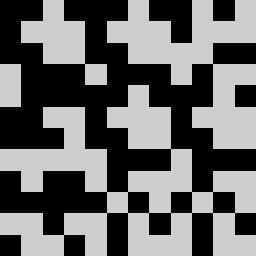

5 18 18


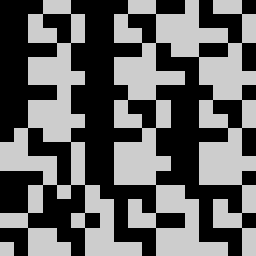

4 155
6 27 27


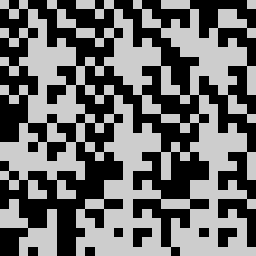

7 36 36


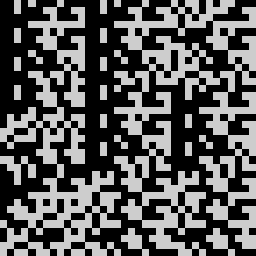

8 54 54


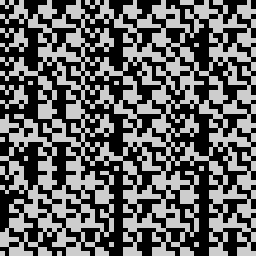

9 81 81


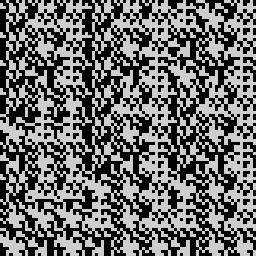

10 108 108


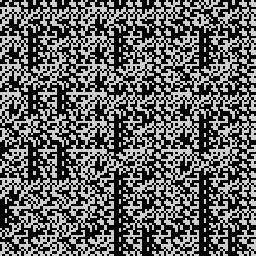

11 162 162


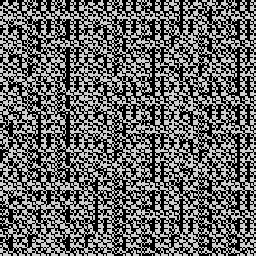

12 243 243


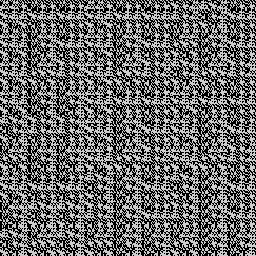

13 324 324


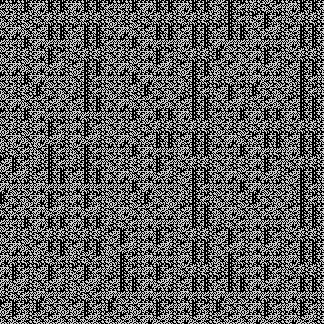

14 486 486


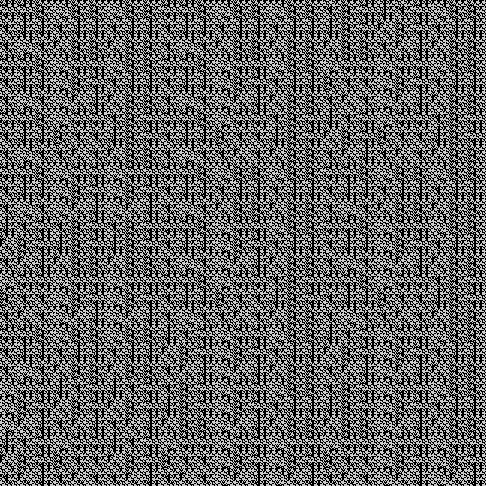

15 729 729


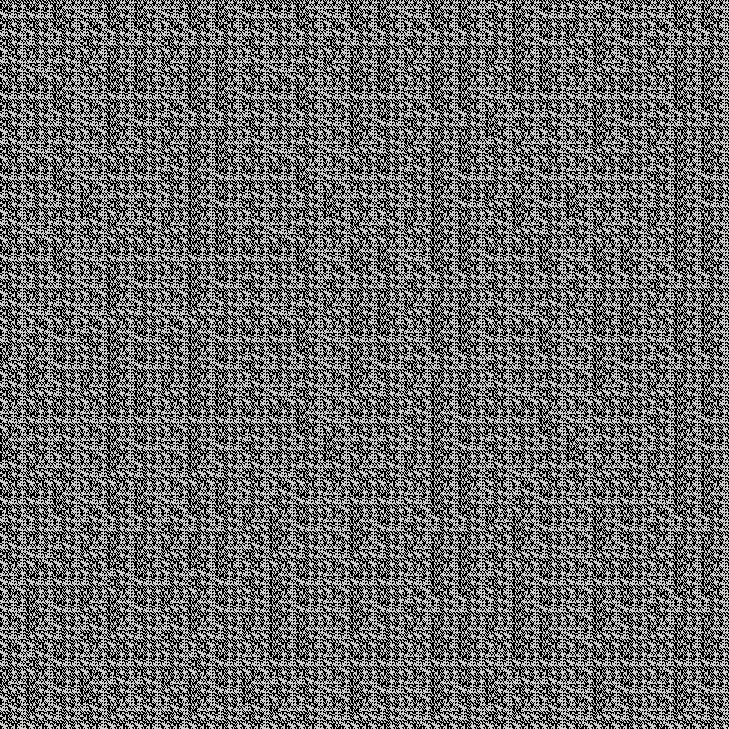

16 972 972


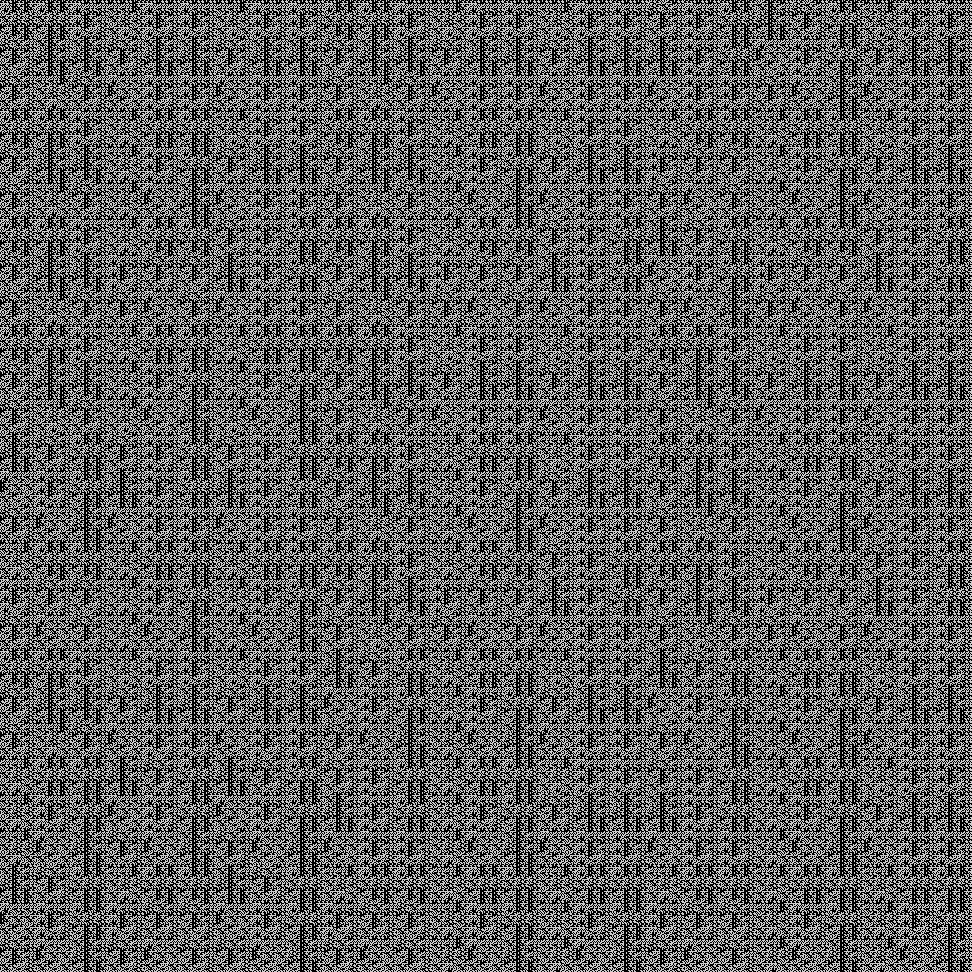

17 1458 1458


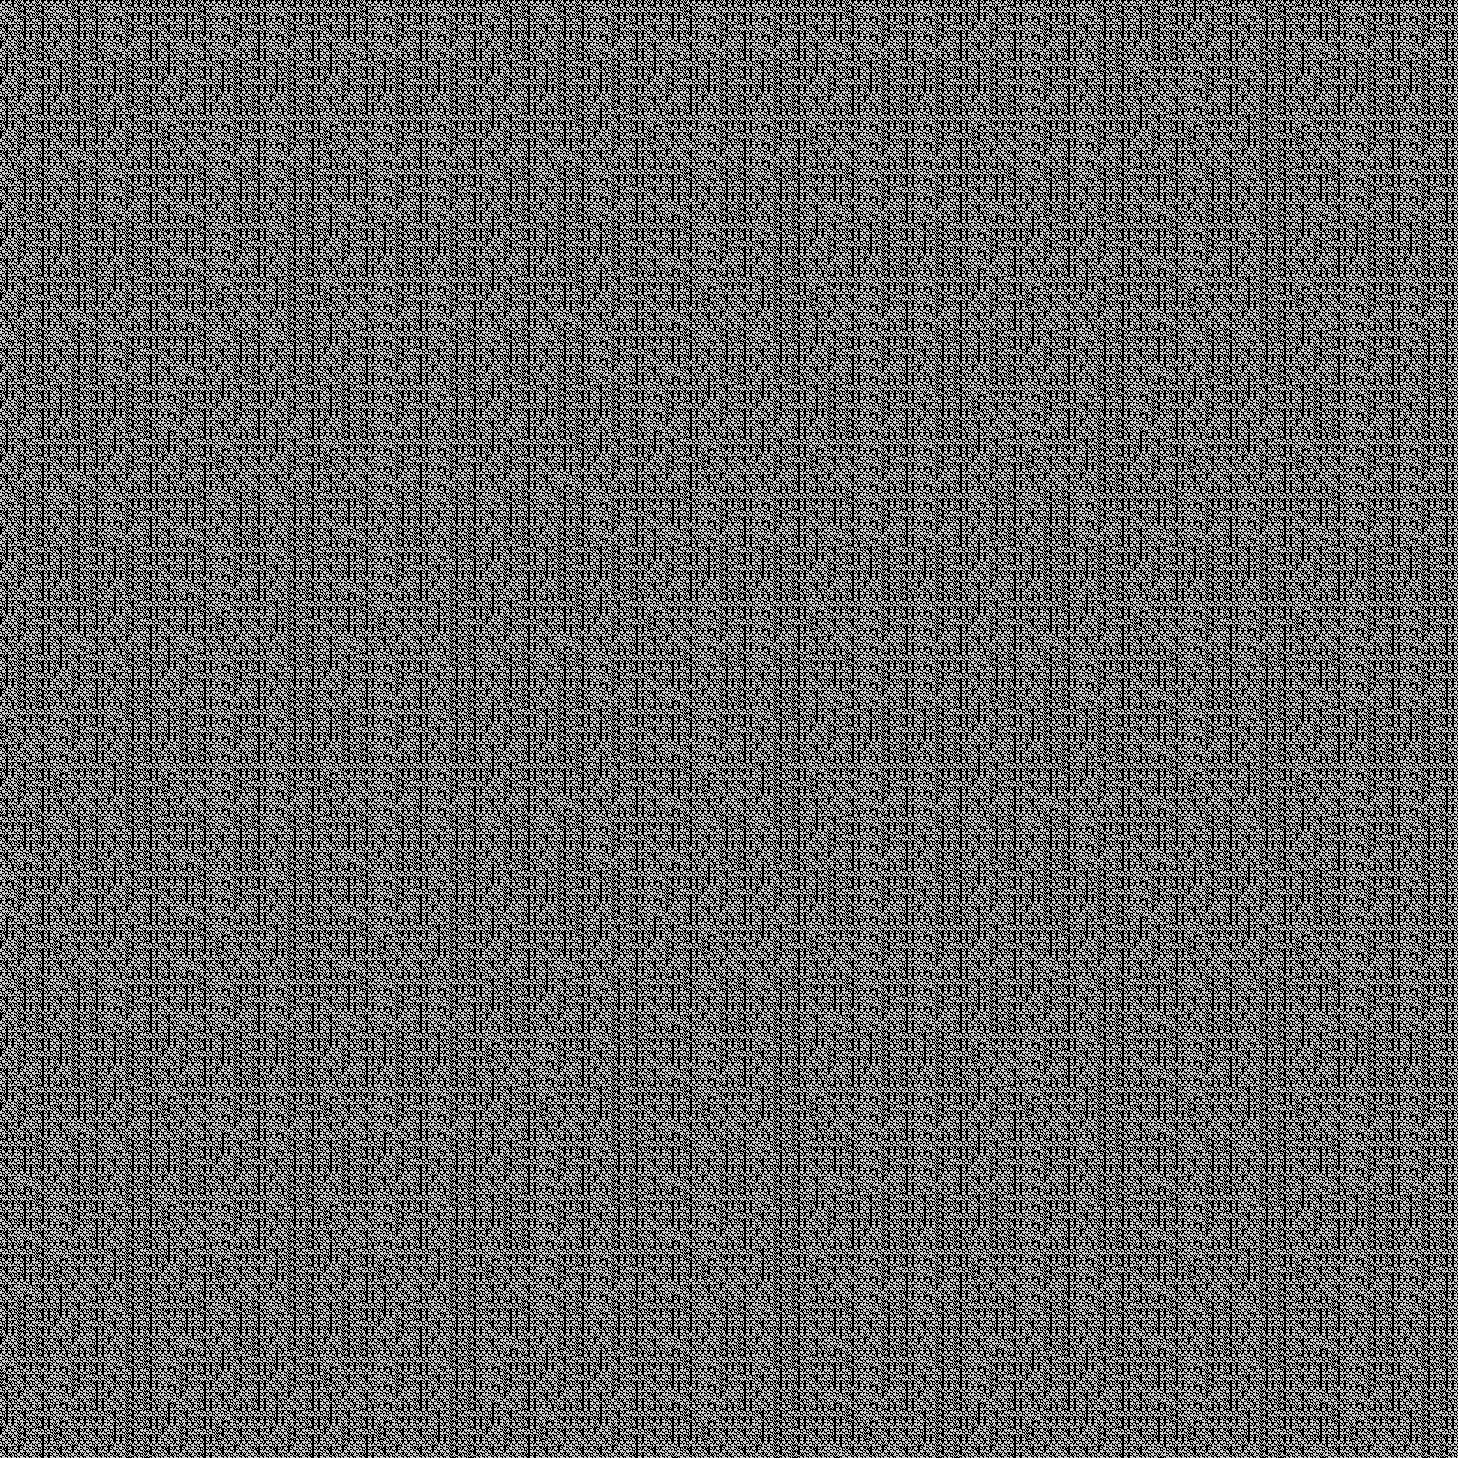

18 2187 2187


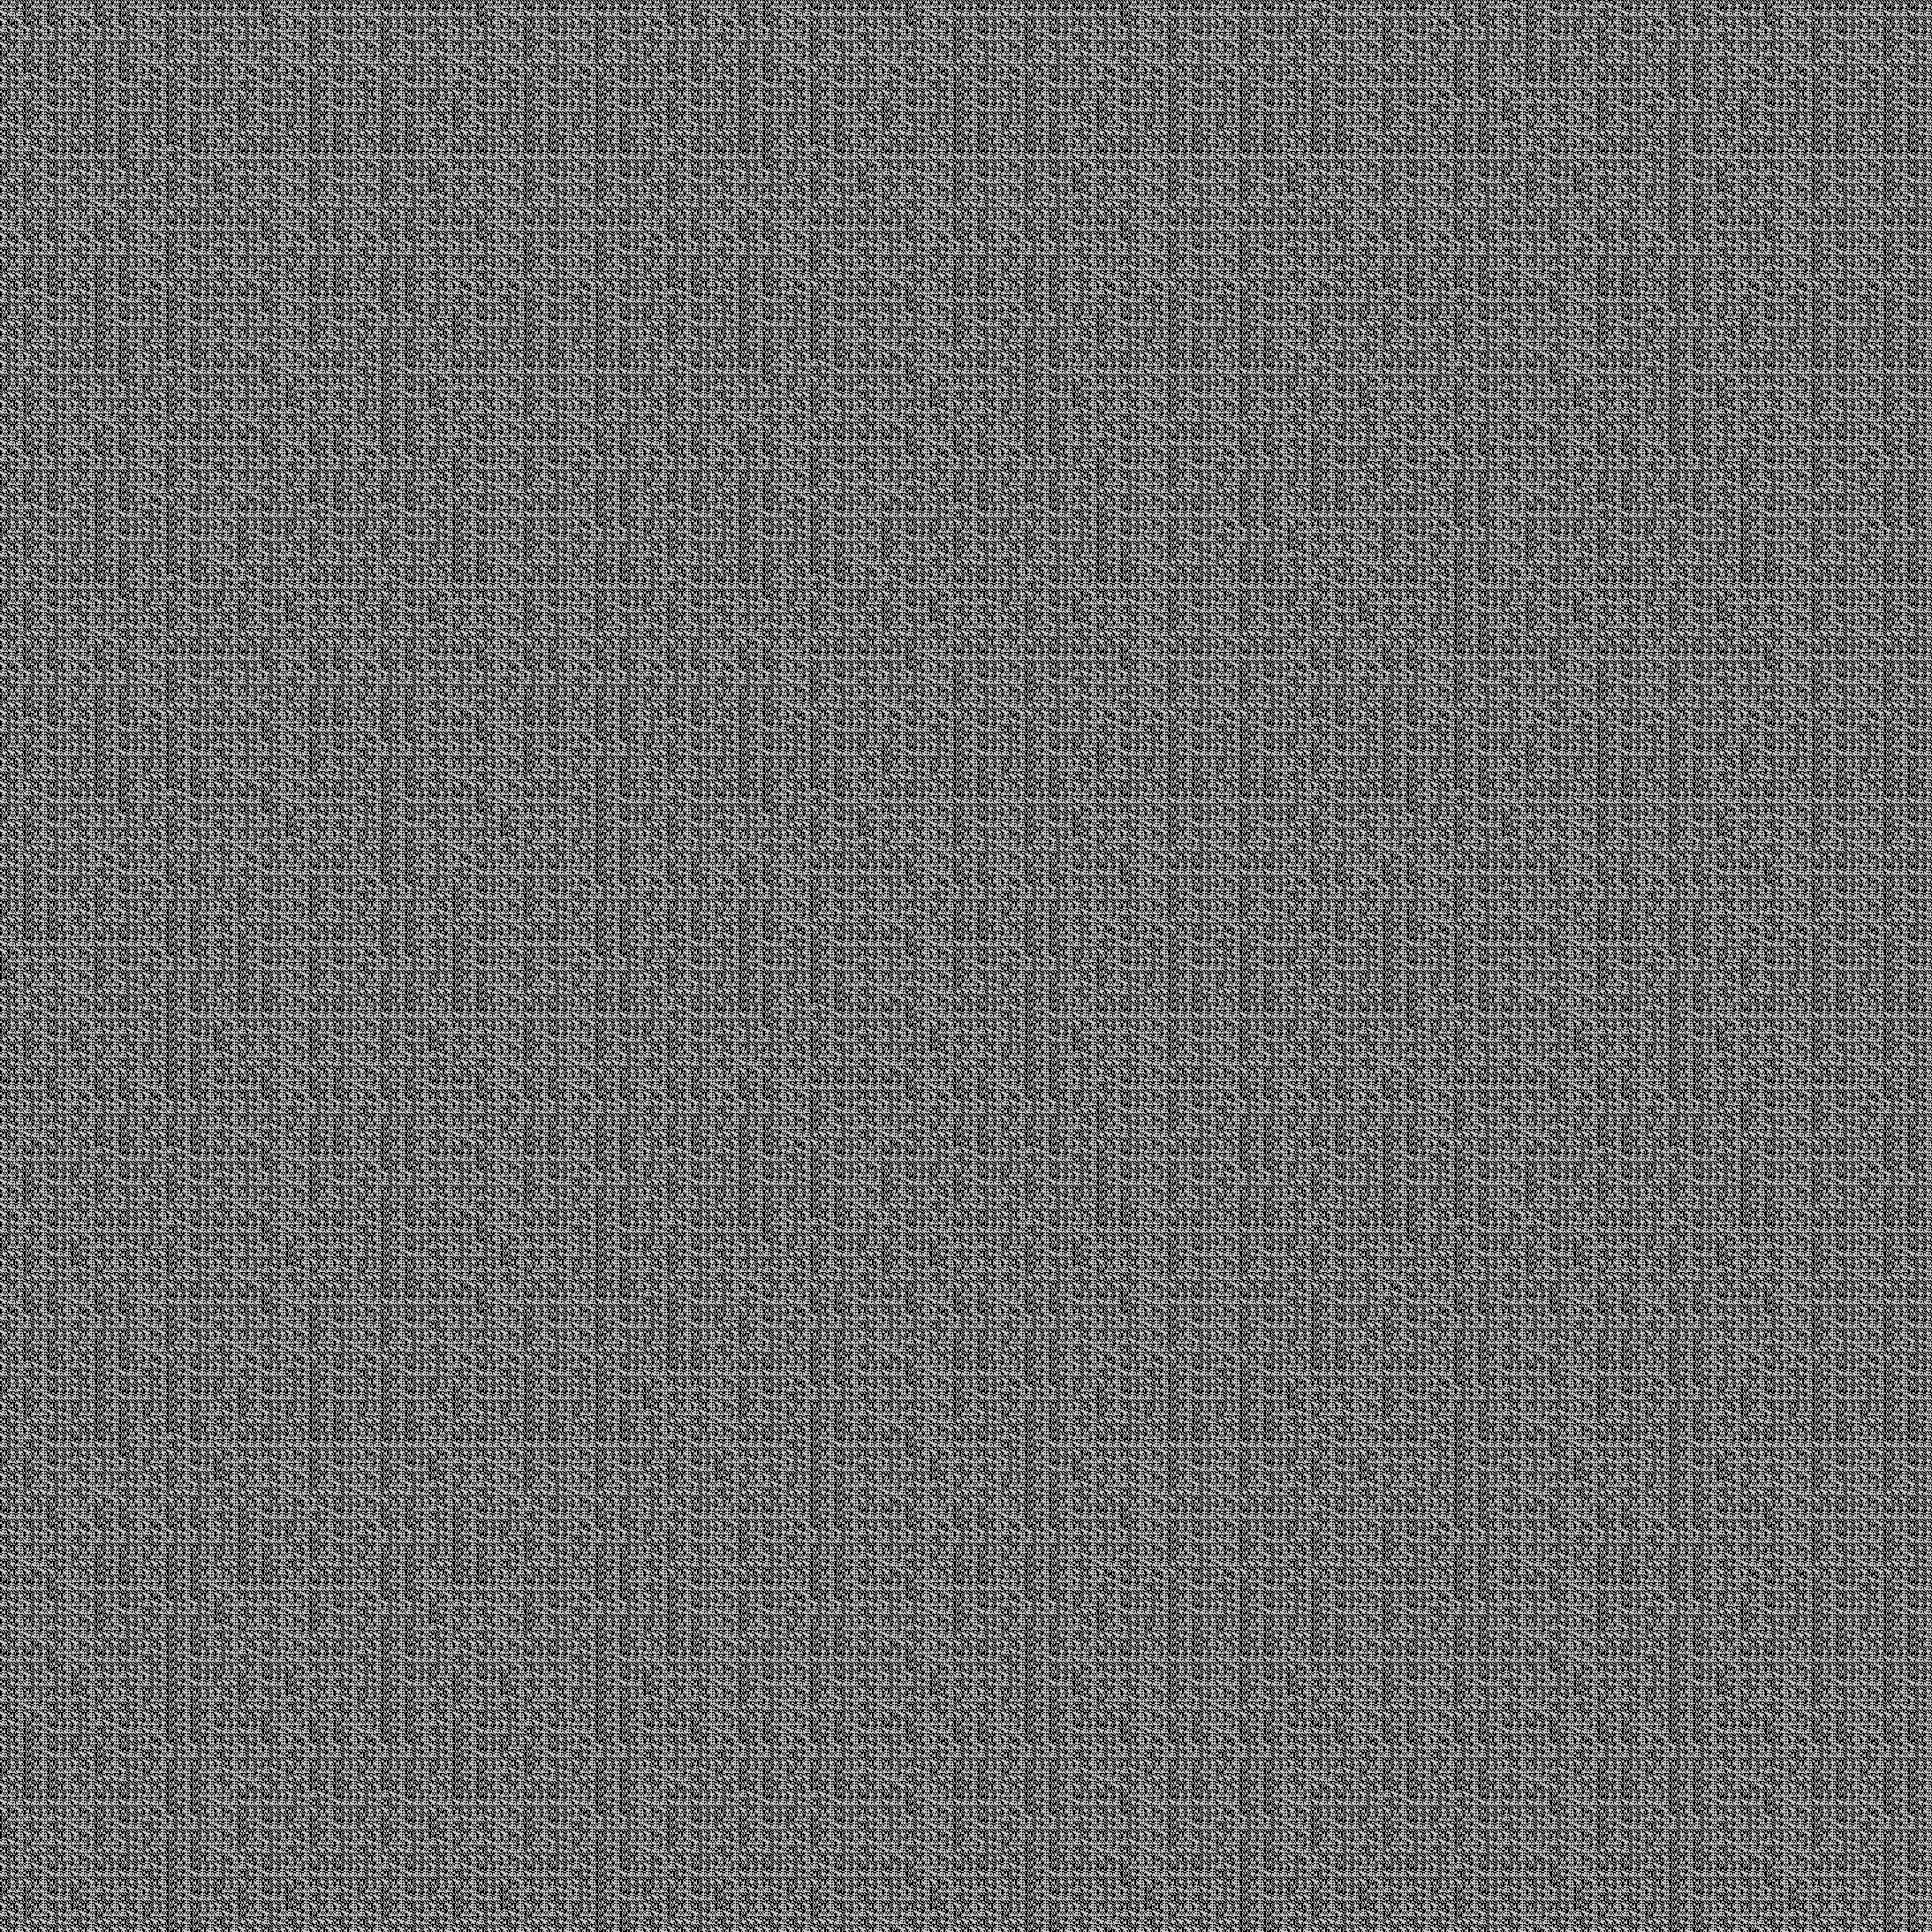

17 2449665
part1and2 [155, 2449665] (155, 2449665)


In [4]:
import numpy as np
from PIL import Image
from IPython.display import display

def tolst(p):
    assert(type(p) is str)
    return [list(x) for x in p.split("/")]

def tostr(p):
    assert(type(p) is list)
    return "/".join(["".join(x) for x in p])

def cw(x,y,w,l):
    return l[x][w-y-1]

def fh(x,y,w,l):
    return l[w-y-1][x]
    
def mut(l, op):
    assert(type(l) is list)
    assert(type(l[0]) is list)
    w=len(l[0])
    h=len(l)
    assert(w==h)
    r=[]
    for y in range(h):
        line=[]
        for x in range(w):
            line.append(op(x,y,w,l))
        r.append(line)
    return r

def split(p,n):
    assert(type(p) is list)
    assert(type(p[0]) is list)
    
    #print("split in ", p, n)
    r=[]
    for y in range(0,len(p),n):
        for x in range(0,len(p[0]),n):
            #print(x,y)
            c=[]
            for yy in range(n):
                l=[]
                for xx in range(n):
                    pass
                    l.append(p[y+yy][x+xx])
                c.append(l)
            r.append(c)
                
    #print("split out ", r)
    return r

def assemble(p):
    assert(type(p) is list)
    assert(type(p[0]) is list)
    assert(type(p[0][0]) is list)
    
    #print("assemble in  ", p)
    cl=len(p)
    cl=int(cl**0.5)
    mw=len(p[0])
    
    r=[]
    W = cl*mw
    #print(mw, W)
    for y in range(W):
        l=[]
        for x in range(W):
            xx=x//mw
            yy=y//mw
            xxx=x%mw
            yyy=y%mw
            #print(p)
            #print(x,y,xx,yy,xxx,yyy)
            l.append(p[yy*cl+xx][yyy][xxx])
            
        r.append(l)
    #print("assemble out  ", r)
    return r

def mutate(p, rules):
    assert(type(p) is list)
    #print("mutate in  ", p)
    p=tostr(p)
    p=rules[p]
    p=tolst(p)
    #print("mutate out ", p)
    return p

def image(p):    
    i = [[205 if x == '#' else 0 for x in l ] for l in p]
    #print(i)
    pix = np.array(i).astype(np.ubyte)
    #print(pix)
    img = Image.fromarray(pix)
    if len(p) < 256:
        img = img.resize((256, 256), Image.Resampling.NEAREST)
    display(img)


def part1and2():
    rules=[x.strip().split(" => ") for x in open("21.txt").readlines()]
    
    rules={x[0]:x[1] for x in rules}
    print("baserules",len(rules.values()))
    #expand rules
    for k in list(rules.keys()):
        kk=tolst(k)
        for o in [cw,cw,cw,fh,cw,cw,cw]:
            kk=mut(kk,o)
            rules[tostr(kk)]=rules[k]
    
    print("expanded rules",len(rules.keys()))
    p=".#./..#/###"
    p=tolst(p)
    image(p)
    r = []
    for step in range(18):
        n=None
        if len(p)%2==0:
            n=2
        elif len(p)%3==0:
            n=3
        else:
            print("fail")
            return 0
        p = split(p,n)
        p = [mutate(x,rules) for x in p]
        p = assemble(p)
        print(step+1, len(p), len(p[0]))
        image(p)
        
        if step+1 in [5, 18]:
            v = sum([x.count('#') for x in p])
            print(step, v)
            r.append(v)
            
    
    #print(p)
    #print([x.count('#') for x in p])
    return r
    
    
print("part1and2", part1and2(),(155, 2449665))
